In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [2]:
df=pd.read_csv('Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [5]:
print(df.shape)

(568454, 10)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
print("Number of Rows",df.shape[0])
print("Number of columns",df.shape[1])

Number of Rows 568454
Number of columns 10


In [8]:
df_dup_row=df[df.duplicated()]

In [9]:
df['ProductId'].value_counts()

ProductId
B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
             ... 
B004DSPTTM      1
B008C9QWU8      1
B007O5A6BM      1
B003Q4TZ08      1
B001LR2CU2      1
Name: count, Length: 74258, dtype: int64

In [10]:
df['ProductId'].unique()

array(['B001E4KFG0', 'B00813GRG4', 'B000LQOCH0', ..., 'B003S1WTCU',
       'B004I613EE', 'B001LR2CU2'], dtype=object)

In [11]:
df['Id'].value_counts()

Id
1         1
378972    1
378966    1
378967    1
378968    1
         ..
189480    1
189479    1
189478    1
189477    1
568454    1
Name: count, Length: 568454, dtype: int64

In [12]:
df['Id'].unique()

array([     1,      2,      3, ..., 568452, 568453, 568454])

In [13]:
df['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [14]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [15]:
df['HelpfulnessDenominator'].value_counts()

HelpfulnessDenominator
0      270052
1      112753
2       61482
3       34394
4       22306
        ...  
197         1
488         1
383         1
219         1
815         1
Name: count, Length: 234, dtype: int64

In [16]:
df['HelpfulnessDenominator'].unique()

array([  1,   0,   3,   4,   2,   5,  19,  13,   9,   7,  15,   8,   6,
        10,  47,  17,  14,  27,  12,  11,  21,  31,  18,  23, 168,  46,
        30, 133,  16,  36,  25,  26,  24,  22,  29,  20,  64, 216,  33,
       112, 108,  51,  37,  39,  89,  35,  43,  42,  74,  49,  34,  28,
        53,  96,  58,  41,  65, 130, 100,  84,  38,  40,  32,  48, 219,
       155,  83,  85,  72,  56,  63, 128,  79,  76,  55,  68,  66,  44,
        94,  59, 117, 188, 134,  92,  57,  71,  98,  90,  45, 135, 170,
        77,  52, 123,  50,  93,  88, 122, 212, 192, 120, 401, 209,  95,
        86,  99,  73,  60, 124,  54,  61,  70, 180,  91,  81, 138, 163,
       307, 270, 151,  78,  62, 119, 139, 137, 215, 539, 305, 562, 477,
       235,  87,  69, 298,  75,  82, 103, 156, 110, 144,  80,  67, 127,
       162, 181, 356, 245, 462, 174, 111, 182, 143, 179, 159, 101, 171,
        97, 249, 384, 187, 121, 263, 131, 165, 416, 106, 878, 536, 238,
       109, 923, 115, 150, 371, 105, 154, 125, 149, 569, 360, 22

In [17]:
df['HelpfulnessNumerator'].value_counts()

HelpfulnessNumerator
0      303826
1      116467
2       53727
3       29007
4       16963
        ...  
446         1
155         1
580         1
355         1
808         1
Name: count, Length: 231, dtype: int64

In [18]:
df['HelpfulnessNumerator'].unique()

array([  1,   0,   3,   4,   2,  19,  13,   9,  15,   5,  17,   8,   6,
         7,  43,  14,  11,  20,  27,  12,  10,  16,  21,  26,  23, 165,
        45,  30, 100,  32,  24,  22,  18,  59, 187,  29, 112, 107,  51,
        36,  25,  88,  35,  38,  42,  70,  86,  48,  34,  96,  53,  40,
        31,  65, 128,  97,  82,  37,  28, 202,  47, 149,  80,  77,  69,
        56,  39, 111,  60,  66,  44,  91, 115,  93, 180, 129,  58,  83,
        55,  62,  89,  50,  33, 135,  71, 157,  73, 122,  90,  81, 203,
       168,  64,  61, 398, 206, 133,  41,  84,  63,  95,  68, 110,  57,
        72,  52,  54,  49, 177,  46, 137, 286,  87, 264,  85, 258,  75,
       119, 123, 131, 125, 200, 536, 301,  78, 559, 472, 232, 294,  79,
        67, 154, 105,  74, 117, 113, 141, 162, 349, 130, 230, 189, 454,
       172, 116, 179, 138, 166, 142, 170, 247, 366, 106, 219,  94,  76,
        92, 413, 139, 866, 524, 233, 104, 844,  99, 144, 124, 491, 355,
       121, 192, 580, 102, 155, 436, 446, 262, 319, 103, 356, 43

In [19]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [22]:
df.shape

(568401, 10)

In [23]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [24]:
df.shape

(568401, 10)

In [25]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [26]:
cate_val=[]
cont_val=[]

for column in df.columns:
    if df[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [27]:
cate_val

['Score']

In [28]:
cont_val

['Id',
 'ProductId',
 'UserId',
 'ProfileName',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Time',
 'Summary',
 'Text']

In [29]:
df['Score']

0         5
1         1
2         4
3         2
4         5
         ..
568449    5
568450    2
568451    5
568452    5
568453    5
Name: Score, Length: 568401, dtype: int64

In [30]:
df.nunique()

Id                        568401
ProductId                  74257
UserId                    256042
ProfileName               218412
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295734
Text                      393560
dtype: int64

In [31]:
type(df)

pandas.core.frame.DataFrame

In [32]:
df.iloc[50:100]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
50,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d..."
51,52,B000G6RPMY,A3S5KJDA6ED2PS,Mike Kaser,4,4,5,1243900800,HOT! And good! Came back for more :),Got a free package of these with a bottle of b...
52,53,B000G6RPMY,A9L6L5H9BPEBO,Edwin C. Pauzer,1,1,4,1348876800,You'll go nuts over Ass-Kickin' Peanuts.,This wasn't in stock the last time I looked. I...
53,54,B000G6RPMY,AQ9DWWYP2KJCQ,"Roel Trevino ""protomex""",0,0,3,1278028800,not ass kickin,we're used to spicy foods down here in south t...
54,55,B002GWHC0G,A1ND7WC5LXOU48,"David Belton ""Proteus 1""",2,2,4,1322438400,Roasts up a smooth brew,I roast at home with a stove-top popcorn poppe...
55,56,B002GWHC0G,A2EFAW1P3DRXWO,TJ Fairfax,0,0,5,1349395200,Our guests love it!,We roast these in a large cast iron pan on the...
56,57,B004N5KULM,A202WR509428VF,amateur amazon shopper,2,2,5,1322438400,Awesome Deal!,Deal was awesome! Arrived before Halloween as...
57,58,B004N5KULM,ASCNNAJU6SXF8,S. Beck,1,1,5,1336176000,How can you go wrong!,"It is chocolate, what can I say. Great variet..."
58,59,B004N5KULM,A2A7KXM9B4XW90,"P. Kelso ""Amazon all the way!""",0,0,5,1320364800,Awsome - Kids in neighborhood loved us!,"Great product, nice combination of chocolates ..."
59,60,B004N5KULM,A2QOGOXPOVKAJG,mimimc,0,0,5,1320105600,great deal.,"Halloween is over but, I sent a bag to my daug..."


In [33]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [34]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568401.000000,568401.000000,568401.000000,568401.000000,5.684010e+05
mean,284228.120582,1.743903,2.227911,4.183297,1.296261e+09
std,164098.955187,7.636845,8.288820,1.310376,4.803804e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142116.000000,0.000000,0.000000,4.000000,1.271290e+09
50%,284225.000000,0.000000,1.000000,5.000000,1.311120e+09
75%,426342.000000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'HelpfulnessNumerator'}>],
       [<Axes: title={'center': 'HelpfulnessDenominator'}>,
        <Axes: title={'center': 'Score'}>],
       [<Axes: title={'center': 'Time'}>, <Axes: >]], dtype=object)

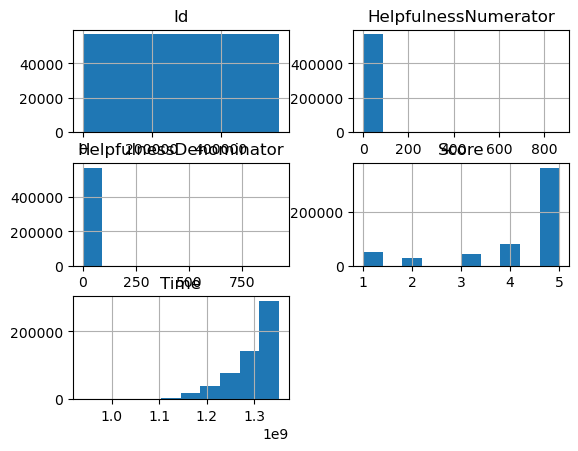

In [35]:
df.hist()

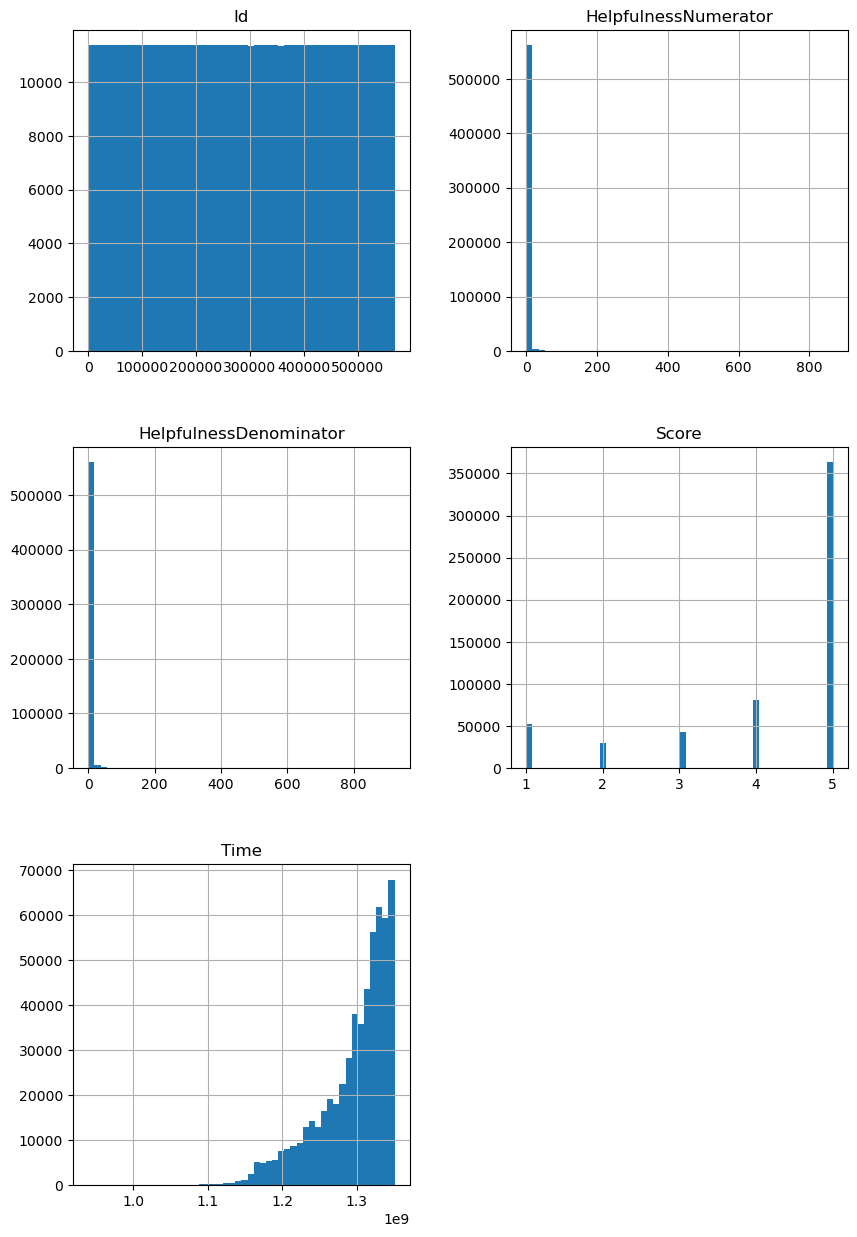

In [36]:
df.hist(bins=50,figsize=(10,15))
plt.show()

<Axes: xlabel='Score', ylabel='Density'>

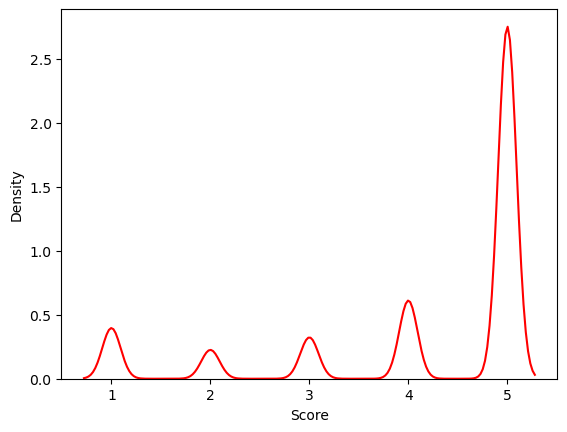

In [37]:
sns.kdeplot(df['Score'],color='red')

In [38]:
print("Target variable frequency distribution:\n",df["Score"].value_counts())

Target variable frequency distribution:
 Score
5    363102
4     80654
1     52264
3     42638
2     29743
Name: count, dtype: int64


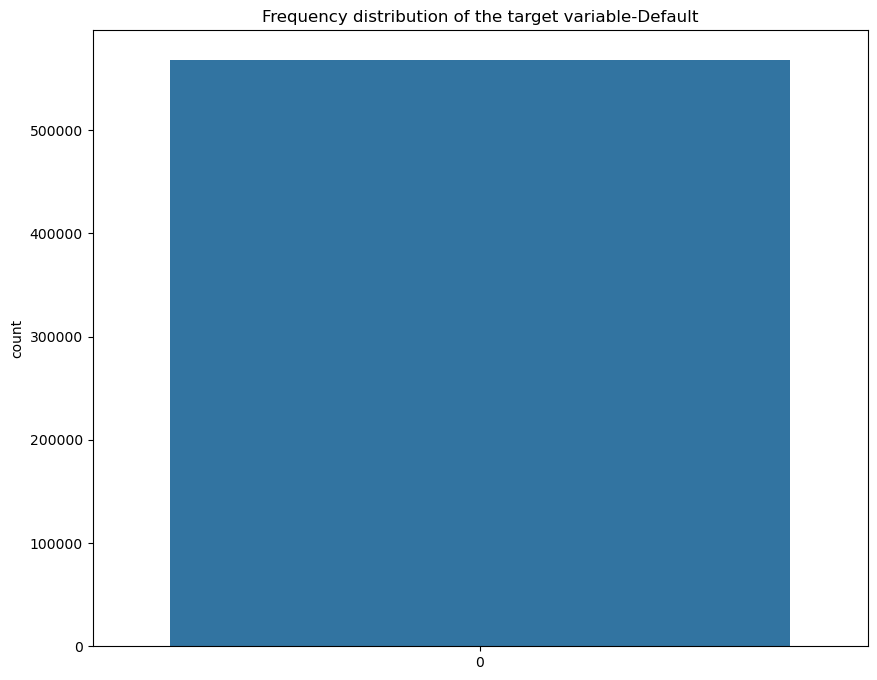

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(df["Score"])
plt.title("Frequency distribution of the target variable-Default")
plt.show()

In [40]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [41]:
from collections import Counter

df['temp_list']=df['Summary'].apply(lambda x:str(x).split())
top=Counter([item for sublist in df['temp_list'] for item in sublist])
temp=pd.DataFrame(top.most_common(30))
temp.columns=['Common_words','Count']
temp.style.background_gradient(cmap='Blues')

,Common_words,Count
0,Great,48228
1,the,39866
2,for,37050
3,and,33269
4,a,28005
5,Good,22434
6,but,20885
7,good,20477
8,to,19745
9,of,19566


In [42]:
from collections import Counter

df['temp_list']=df['Text'].apply(lambda x:str(x).split())
top=Counter([item for sublist in df['temp_list'] for item in sublist])
temp=pd.DataFrame(top.most_common(30))
temp.columns=['Common_words','Count']
temp.style.background_gradient(cmap='Reds')

,Common_words,Count
0,the,1628013
1,I,1388019
2,and,1228614
3,a,1163094
4,to,992335
5,of,789640
6,is,714252
7,it,631235
8,for,519974
9,in,512384


In [43]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,temp_list
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,"[I, have, bought, several, of, the, Vitality, ..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"[Product, arrived, labeled, as, Jumbo, Salted,..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"[This, is, a, confection, that, has, been, aro..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,"[If, you, are, looking, for, the, secret, ingr..."
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,"[Great, taffy, at, a, great, price., There, wa..."


In [44]:
example=df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [45]:
import nltk
tokens=nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [46]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/vivek/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [47]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [48]:
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/vivek/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/vivek/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [49]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [50]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import tensorflow as tf

2024-01-27 08:24:44.403618: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-27 08:24:44.445527: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-27 08:24:44.661412: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-27 08:24:44.661501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-27 08:24:44.707673: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [51]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/vivek/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [52]:
sia=SentimentIntensityAnalyzer()

In [53]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [54]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [55]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [56]:
res={}
for i, row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid=row['Id']
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/568401 [00:00<?, ?it/s]

In [57]:
df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,temp_list
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,"[I, have, bought, several, of, the, Vitality, ..."


In [58]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')

In [59]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,temp_list
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,"[I, have, bought, several, of, the, Vitality, ..."
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"[Product, arrived, labeled, as, Jumbo, Salted,..."
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"[This, is, a, confection, that, has, been, aro..."
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,"[If, you, are, looking, for, the, secret, ingr..."
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,"[Great, taffy, at, a, great, price., There, wa..."


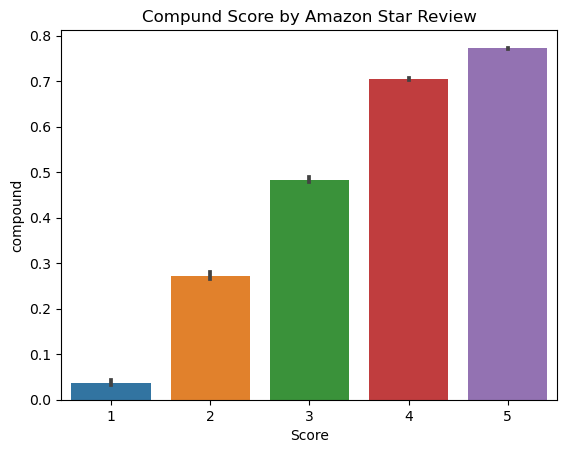

In [60]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()


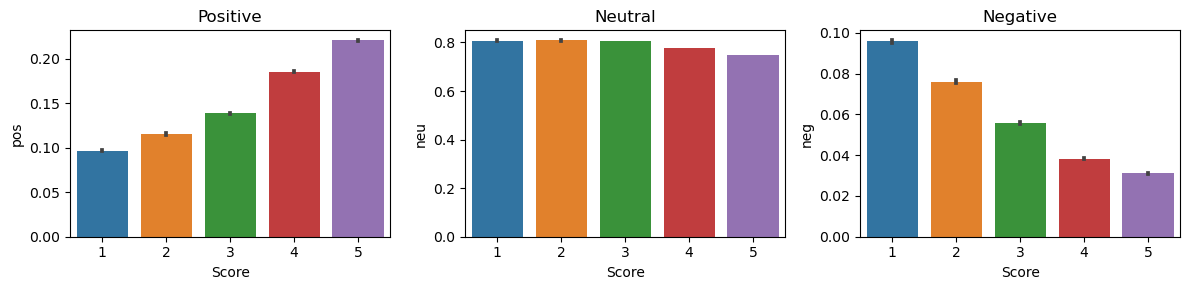

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [62]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [63]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("roberta-base")
model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base")


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

In [64]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}